In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("Dataset/data.csv")

# Exploratory Data Analysis(EDA)

In [14]:
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [16]:
df.dtypes # Data type Of Each Column

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

In [17]:
df.isnull().sum() # There are no null values in the dataset

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [18]:
df.describe() # It describes the Basic Statistics for the numerical Columns - Mean,Median,Mode

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [19]:
# checking for duplicated values
df.duplicated().sum()

np.int64(1)

In [20]:
# Duplicated Row
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
766        31         5   3    3   6    1  48   6           21     0


In [21]:
# Removing the Duplicated Row
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [22]:
df.to_csv('Dataset/data_cleaned.csv', index=False)

# Feature Engineering



In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count of outliers
outliers_count = outliers.sum()
print("Outliers count per column:")
print(outliers_count)

# View rows with outliers 
outlier_rows = df[outliers.any(axis=1)]
print("Rows with outliers:")
print(outlier_rows)


Outliers count per column:
footfall       154
tempMode         0
AQ               0
USS              0
CS              87
VOC              0
RP               0
IP               0
Temperature     48
fail             0
dtype: int64
Rows with outliers:
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1     0
2          31         7   2    2   6    1  24   6            1     0
3          83         4   3    4   5    1  28   6            1     0
4         640         7   5    6   4    0  68   6            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
906       900         0   3    4   7    2  30   5           24     0
920      3500         7   7    3   5    4  34   7           24     0
930      7300         7   3    3   5    1  40   7           24     1
934      1600         7   4    2   5    6  56   7           

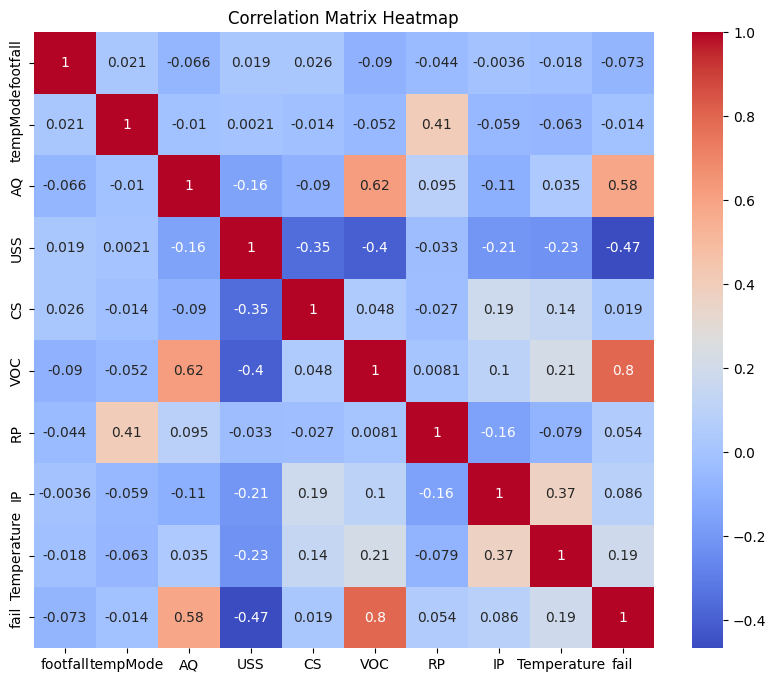

In [24]:
# Correlation Matrix - It helps in establishing a strong relationship between the numerical fields
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


# Model Training

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [26]:
X = df.drop(columns=['fail'])  # Input Feature
y = df['fail']  # Output Feature

# Split the dataset into training and testing sets- 80%- training dataset, 20%-testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and classification
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # for handling the missing vakues
    ('scaler', StandardScaler()),  # normalising the input values
    ('classifier', RandomForestClassifier(random_state=42))  # Placeholder for classifier
])

# shape and size of training and testing dataset
print(f'Training data shape: {X_train.shape}, Test data shape: {X_test.shape}')


Training data shape: (754, 9), Test data shape: (189, 9)


In [27]:
# Random Forest Classifier
pipeline.set_params(classifier=RandomForestClassifier(random_state=42))
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = pipeline.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8941798941798942
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       100
           1       0.90      0.88      0.89        89

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



In [28]:
# Logistic Regression
pipeline.set_params(classifier=LogisticRegression(random_state=42))
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = pipeline.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       100
           1       0.87      0.90      0.88        89

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



In [29]:
# Support Vector Classifier
pipeline.set_params(classifier=SVC(random_state=42))
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_svc = pipeline.predict(X_test)
print(f'SVC Accuracy: {accuracy_score(y_test, y_pred_svc)}')
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.8941798941798942
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       100
           1       0.88      0.90      0.89        89

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



In [30]:
# K-Nearest Neighbors
pipeline.set_params(classifier=KNeighborsClassifier())
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = pipeline.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       100
           1       0.86      0.91      0.89        89

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



In [31]:
# Decision Tree Classifier
pipeline.set_params(classifier=DecisionTreeClassifier(random_state=42))
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = pipeline.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.783068783068783
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.78      0.75      0.77        89

    accuracy                           0.78       189
   macro avg       0.78      0.78      0.78       189
weighted avg       0.78      0.78      0.78       189



In [32]:
# Naive Bayes Classifier
pipeline.set_params(classifier=GaussianNB())
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = pipeline.predict(X_test)
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.88      0.92      0.90        89

    accuracy                           0.90       189
   macro avg       0.90      0.91      0.90       189
weighted avg       0.91      0.90      0.90       189



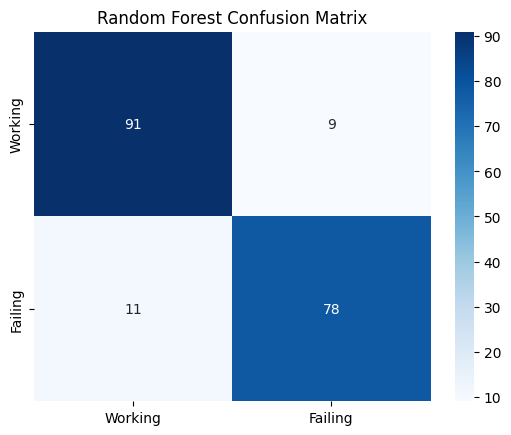

In [33]:
# Confusion Matrix for Random Forest (Example)
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Working', 'Failing'], yticklabels=['Working', 'Failing'])
plt.title('Random Forest Confusion Matrix')
plt.show()


In [34]:
# Retrain the best model (Random Forest in this example) on the full dataset
final_model =classifier=GaussianNB()
final_model.fit(X, y)


GaussianNB()

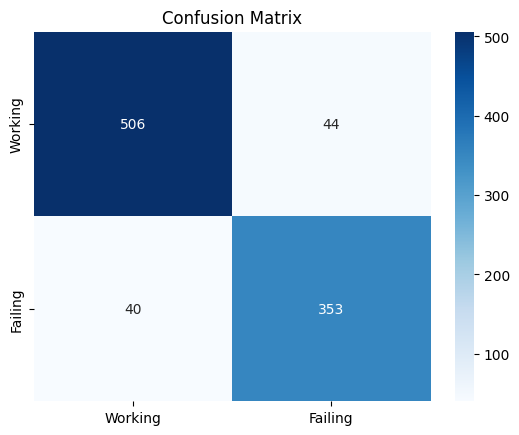

In [35]:
y_pred = final_model.predict(X)  # Make predictions on the entire dataset

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Working', 'Failing'], yticklabels=['Working', 'Failing'])
plt.title('Confusion Matrix')
plt.show()

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       550
           1       0.89      0.90      0.89       393

    accuracy                           0.91       943
   macro avg       0.91      0.91      0.91       943
weighted avg       0.91      0.91      0.91       943



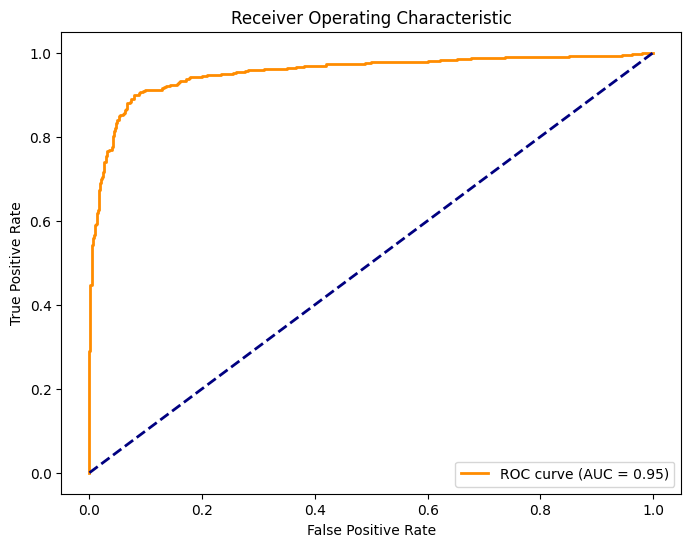

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y, final_model.predict_proba(X)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [38]:
import pandas as pd

class PredictiveMaintenanceRecommender:
    def __init__(self, model, healthy_threshold=80):
        self.model = model
        self.healthy_threshold = healthy_threshold

    def predict_machine_condition(self, equipment_data):
        failure_probability = self.model.predict_proba(equipment_data)[:, 1]
        equipment_data['machine_condition(%)'] = (1 - failure_probability)*100
        return equipment_data

    def recommend_maintenance_schedule(self, equipment_data):
        equipment_data = self.predict_machine_condition(equipment_data)

        recommendations = equipment_data.copy()
        recommendations['recommended_maintenance'] = recommendations['machine_condition(%)'] < self.healthy_threshold

        return recommendations

In [39]:
# Creating a recomender instance
recommender = PredictiveMaintenanceRecommender(model=final_model)

# creating a manual dataset to check whether the system requires maintaince
current_equipment = pd.DataFrame({
    'footfall': [0, 150, 120],
    'tempMode': [7, 5, 7],
    'AQ': [7, 5, 3],
    'USS': [1, 2, 6],
    'CS': [6, 3, 5],
    'VOC': [6, 5, 1],
    'RP': [36, 31, 45],
    'IP': [3,3,9],
    'Temperature':[1,5,9]
})

# Getting the maintaince recommendations using our own created dataset
recommendations = recommender.recommend_maintenance_schedule(current_equipment)
print(recommendations)

   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  \
0         0         7   7    1   6    6  36   3            1   
1       150         5   5    2   3    5  31   3            5   
2       120         7   3    6   5    1  45   9            9   

   machine_condition(%)  recommended_maintenance  
0              0.170056                     True  
1             19.472444                     True  
2             99.999727                    False  


### Saving Our Model In the Pickle File

In [41]:
import pickle
model = final_model

# Saving model into a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)